### Big Mart Sales Prediction

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly

In [1]:
 # importing Librares
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
data = pd.read_csv(r'C:\Users\kamlesh\Downloads\Big_mart_data\train_v9rqX0R.csv')

In [3]:
test = pd.read_csv(r'C:\Users\kamlesh\Downloads\Big_mart_data\test_AbJTz2l.csv')

In [4]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
data.shape

(8523, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
# checking unique values
data.apply(lambda x:len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [12]:
test['Item_Weight'].mean()

12.695633368756374

In [13]:
# filling the missing value in "Item_Weights" with Mean() value

test['Item_Weight'].fillna(test['Item_Weight'].mean(), inplace=True)

#filling the missing value in "Outlet_Size " with mode value

test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0], inplace=True)

In [14]:
data['Item_Weight'].mean()

12.857645184136183

In [15]:
# filling the missing value in "Item_Weights" with Mean() value

data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)

In [16]:
# Mode of "Outlet_size"
data['Outlet_Size'].mode()

0    Medium
dtype: object

In [17]:
#filling the missing value in "Outlet_Size " with mode value

#data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace=True)

mode_of_outlet_size = data.pivot_table(values='Outlet_Size',columns='Outlet_Type', aggfunc=(lambda x:x.mode()[0]))

In [18]:
mode_of_outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [19]:
miss_values=data['Outlet_Size'].isnull()

In [20]:
miss_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [21]:
data.loc[miss_values,'Outlet_Size']=data.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])

In [22]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [23]:
test['Item_Fat_Content'].value_counts()
test.replace({'Item_Fat_Content':{'LF':'Low Fat','low fat':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [24]:
test['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [25]:
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

* If we check our data it seems like there is only two types of Fat content available in data like Low FAT & REGULAR, so we will try extract data in this 2 forms


In [26]:
data.replace({'Item_Fat_Content':{'LF':'Low Fat','low fat':'Low Fat', 'reg':'Regular'}}, inplace=True)

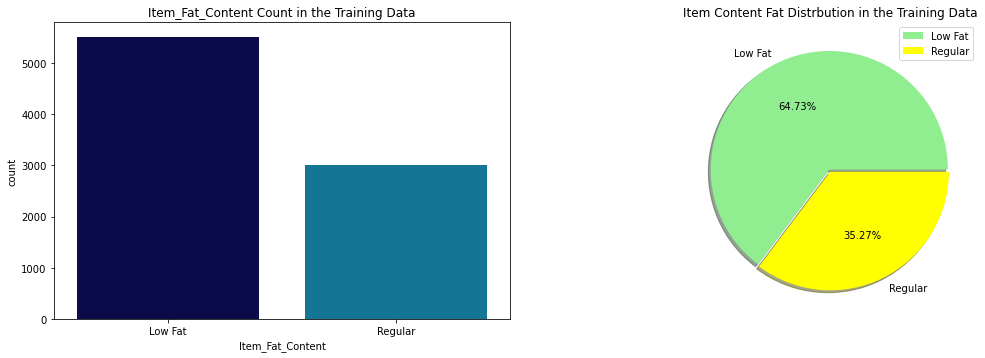

In [27]:
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
plt.title("Item_Fat_Content Count in the Training Data")
sns.countplot(x='Item_Fat_Content', data=data, palette='ocean')

plt.subplot(2,2,2)
low_fat = data.Item_Fat_Content[data.Item_Fat_Content == 'Low Fat'].count()
reg = data.Item_Fat_Content[data.Item_Fat_Content == 'Regular'].count()
plt.title("Item Content Fat Distrbution in the Training Data")
plt.pie([low_fat, reg], labels=['Low Fat', 'Regular'], explode=[0.01,0.01], autopct="%.2f%%", colors=['lightgreen', 'yellow'], shadow=True)
plt.legend()

plt.show()

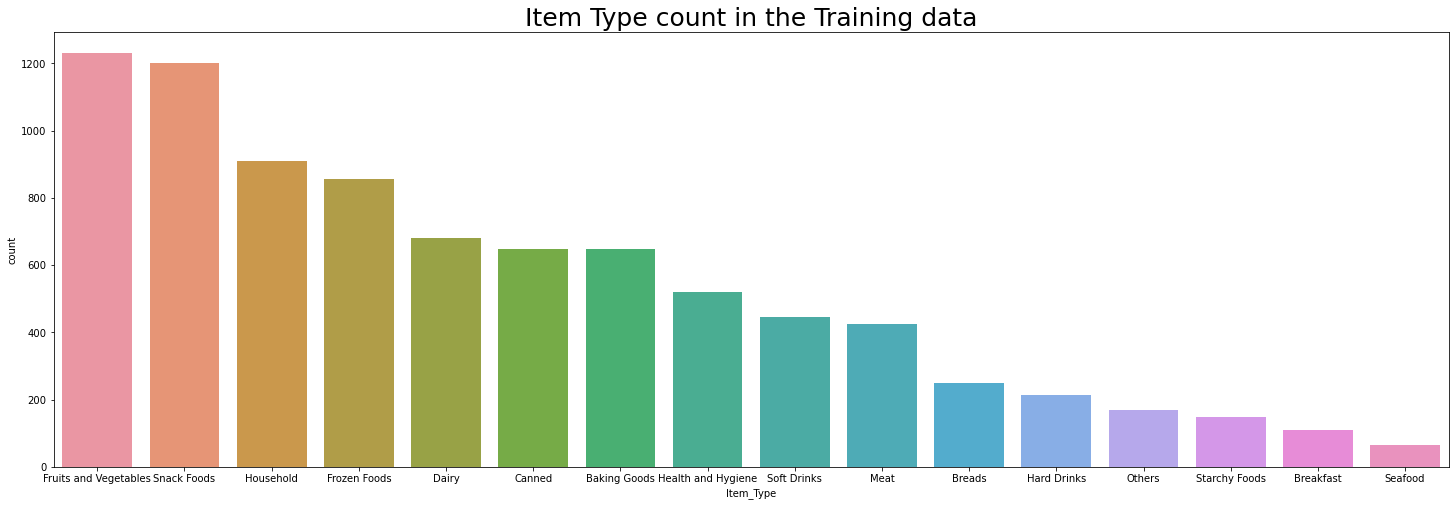

In [28]:
plt.figure(figsize=(25,8))
plt.title("Item Type count in the Training data", {"fontsize" : 25})
order = data.groupby('Item_Type').count().sort_values(by='Item_Outlet_Sales', ascending=False).index
sns.countplot(x='Item_Type', data=data, order=order);

###### Fruits and Vegetables are largely sold as people tend to use them on daily purpose
###### Snack Foods too have good sales.

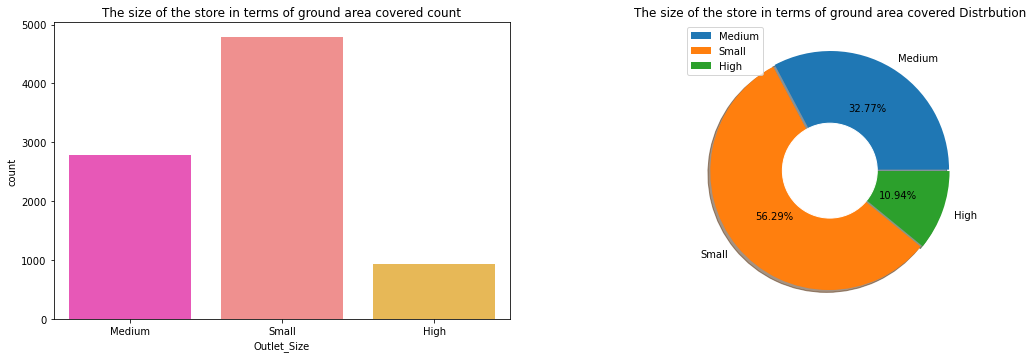

In [29]:
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
plt.title("The size of the store in terms of ground area covered count")
sns.countplot(x='Outlet_Size', data=data, palette='spring')

plt.subplot(2,2,2)
medium = data.Outlet_Size[data.Outlet_Size == 'Medium'].count()
small = data.Outlet_Size[data.Outlet_Size == 'Small'].count()
high = data.Outlet_Size[data.Outlet_Size == 'High'].count()
plt.title("The size of the store in terms of ground area covered Distrbution")
plt.pie([medium, small, high], labels=['Medium', 'Small', 'High'], autopct="%.2f%%", shadow=True, explode=[0.01,0.01,0.01])
my_circle = plt.Circle( (0,0), 0.4, color='white')
plt.gcf().gca().add_artist(my_circle)
plt.legend()

plt.show()

Small Size has the majoirty in the data 56.29%

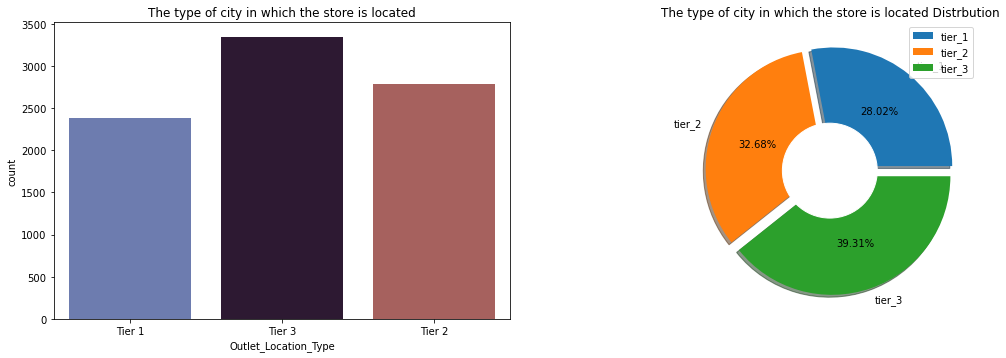

In [30]:
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
plt.title("The type of city in which the store is located")
sns.countplot(x='Outlet_Location_Type', data=data, palette='twilight')

plt.subplot(2,2,2)
tier_1 = data.Outlet_Location_Type[data.Outlet_Location_Type == 'Tier 1'].count()
tier_2 = data.Outlet_Location_Type[data.Outlet_Location_Type == 'Tier 2'].count()
tier_3 = data.Outlet_Location_Type[data.Outlet_Location_Type == 'Tier 3'].count()
plt.title("The type of city in which the store is located Distrbution")
plt.pie([tier_1, tier_2, tier_3], labels=['tier_1', 'tier_2', 'tier_3'], autopct="%.2f%%", shadow=True, explode=[0.05,0.05,0.05])
my_circle = plt.Circle( (0,0), 0.4, color='white')
plt.gcf().gca().add_artist(my_circle)
plt.legend()

plt.show()

The Outlets are maximum in number in Tier 3 Cities.

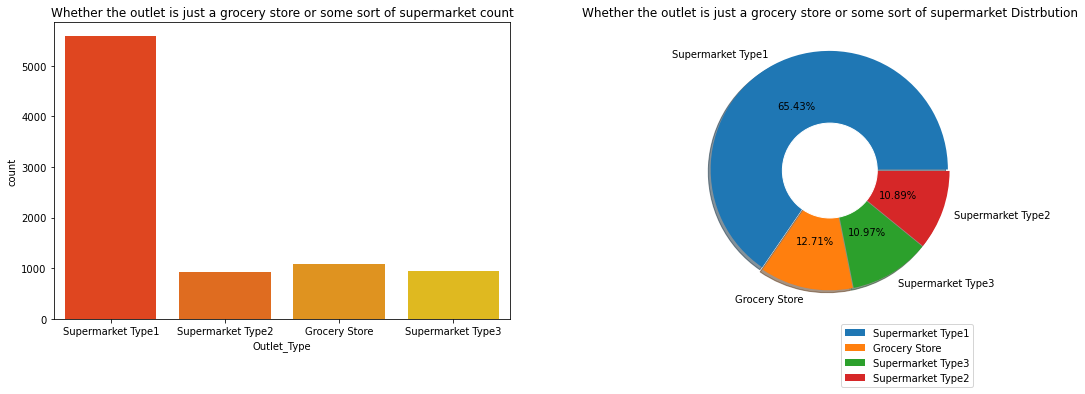

In [31]:
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
plt.title("Whether the outlet is just a grocery store or some sort of supermarket count")
sns.countplot(x='Outlet_Type', data=data, palette='autumn')

plt.subplot(2,2,2)
sup_1 = data.Outlet_Type[data.Outlet_Type == 'Supermarket Type1'].count()
goc = data.Outlet_Type[data.Outlet_Type == 'Grocery Store'].count()
sup_3 = data.Outlet_Type[data.Outlet_Type == 'Supermarket Type3'].count()
sup_2 = data.Outlet_Type[data.Outlet_Type == 'Supermarket Type2'].count()
plt.title("Whether the outlet is just a grocery store or some sort of supermarket Distrbution")
plt.pie([sup_1, goc, sup_3, sup_2], labels=['Supermarket Type1', 'Grocery Store', 'Supermarket Type3', 'Supermarket Type2'], autopct="%.2f%%", shadow=True, explode=[0.01,0.01,0.01, 0.01])
my_circle = plt.Circle( (0,0), 0.4, color='white')
plt.gcf().gca().add_artist(my_circle)
plt.legend(bbox_to_anchor=(1, 0))

plt.show()

The Outlets are more of Supermarket Type1

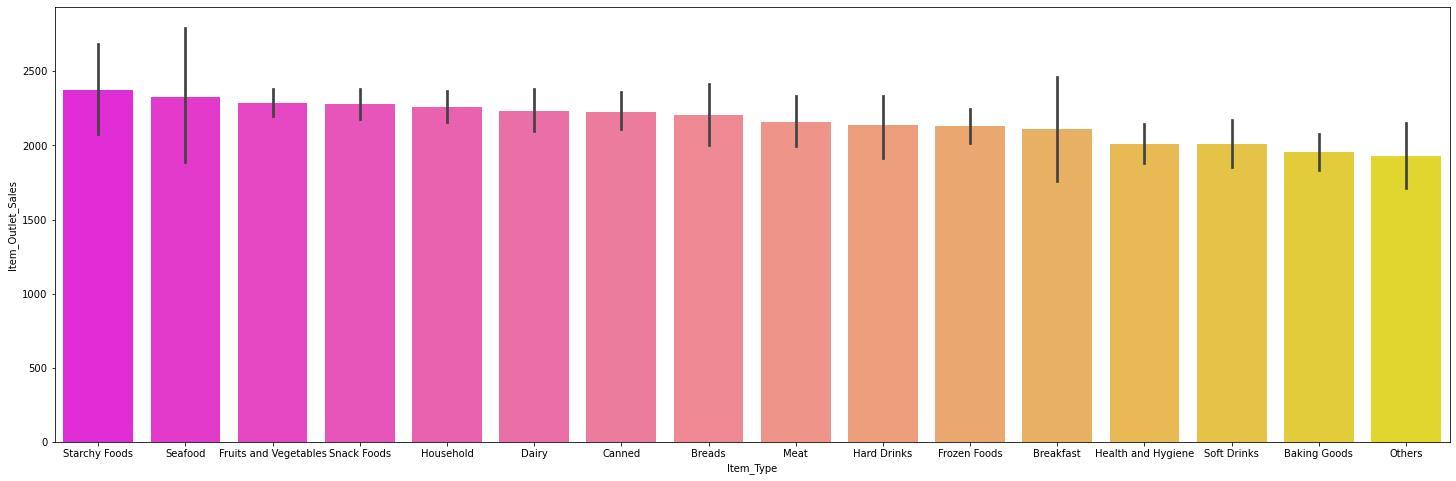

In [32]:
plt.figure(figsize=(25,8))

order=data.groupby('Item_Type').mean().sort_values(by='Item_Outlet_Sales', ascending=False).index
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=data,palette='spring', order=order);

C:\Users\kamlesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\kamlesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\kamlesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\kamlesh

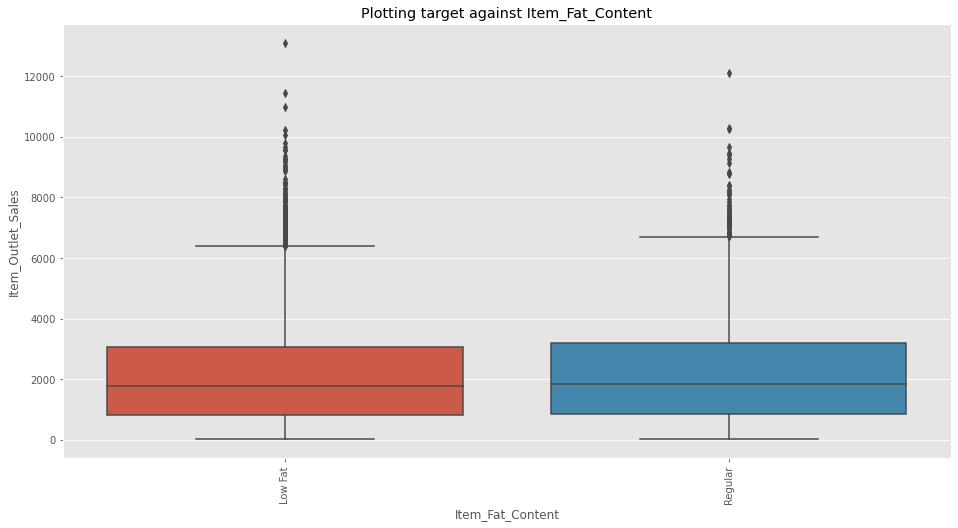

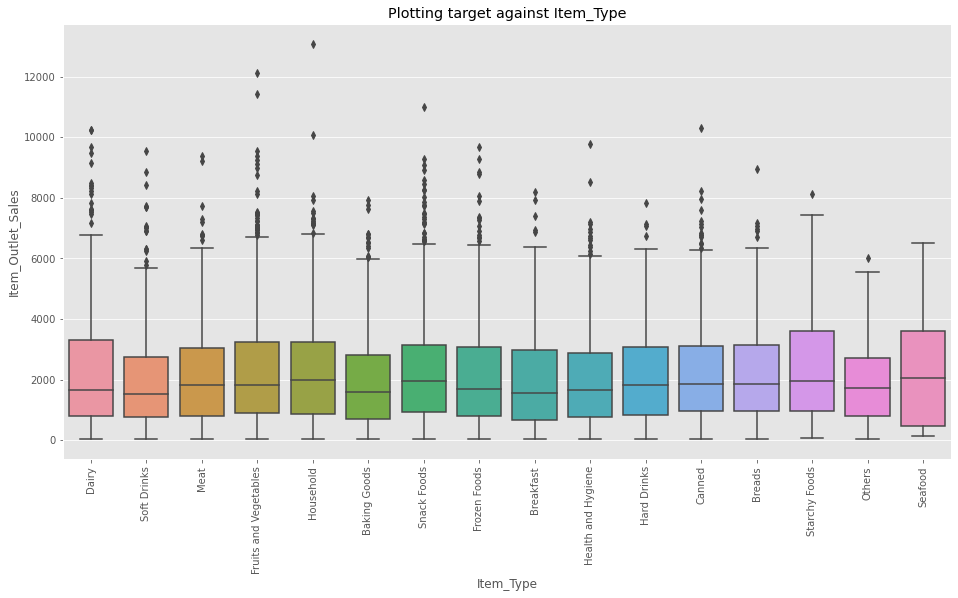

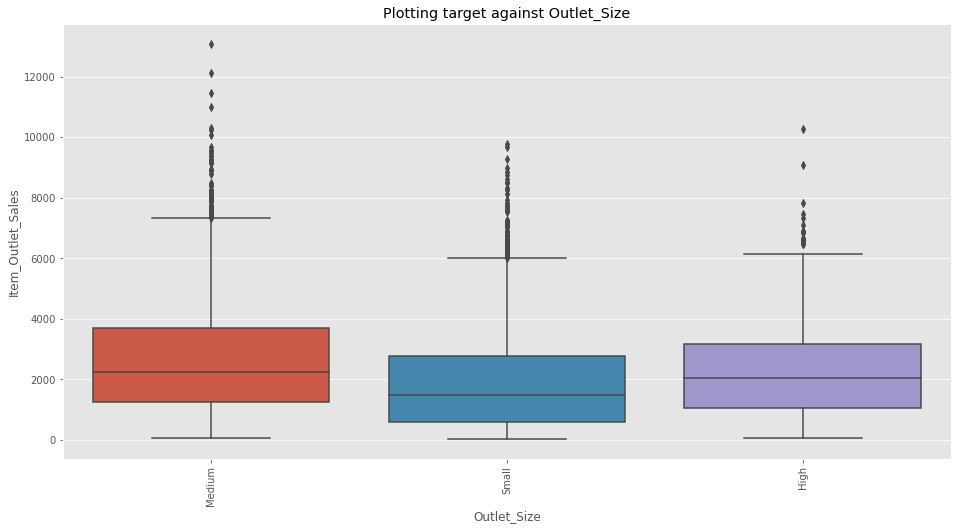

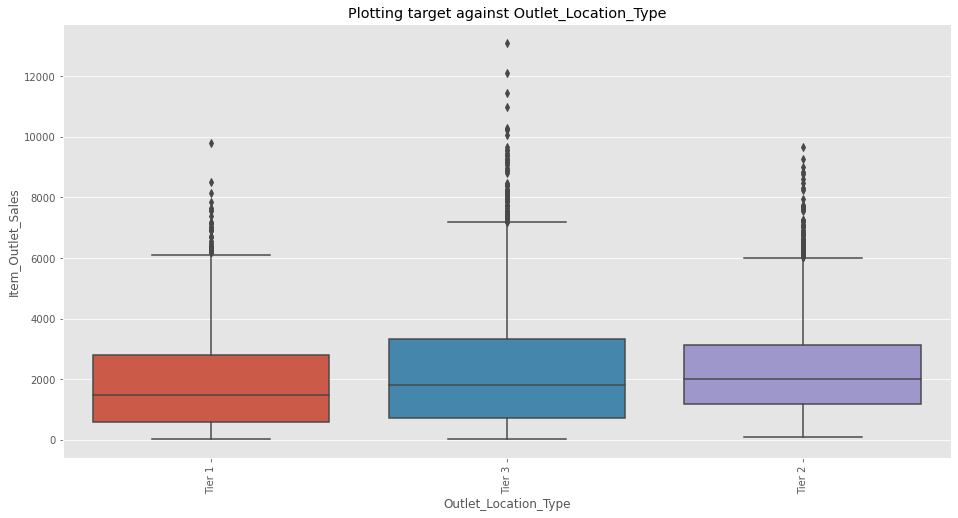

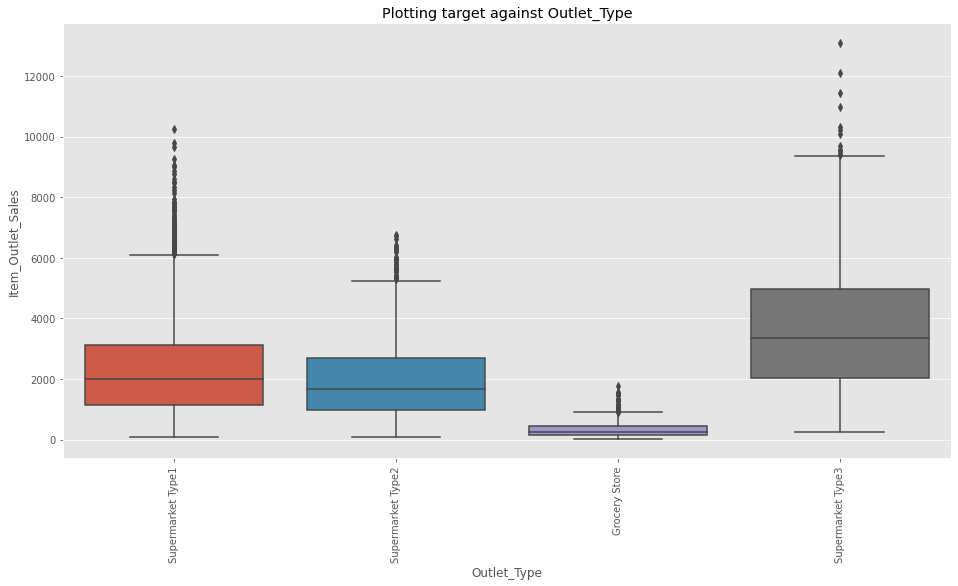

In [33]:
plt.style.use('ggplot')
categorical = ["Item_Fat_Content","Item_Type","Outlet_Size","Outlet_Location_Type","Outlet_Type"]

# Plotting a bar chart for each of the cateorical variable
for column in categorical:
    plt.figure(figsize=(35,8))
    plt.subplot(121)
    sns.boxplot(data[column],data["Item_Outlet_Sales"])
    plt.title('Plotting target against ' + column)
    plt.xticks(rotation='vertical')
    plt.xlabel(column)
    plt.ylabel('Item_Outlet_Sales')

In [34]:
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [35]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [36]:
encode = LabelEncoder()
list_transform = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type']

for i in list_transform:
    data[i] = encode.fit_transform(data[i])
    
for i in list_transform:
    test[i] = encode.fit_transform(test[i])

In [37]:
data=data.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)
test=test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [38]:
data.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.021157,-0.012049,0.024756,-0.014105,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.021157,1.000000,0.047314,0.006063,-0.001262,-0.001598,0.002199,0.018719
Item_Visibility,-0.012049,0.047314,1.000000,-0.001315,0.094025,-0.028099,-0.173468,-0.128625
Item_MRP,0.024756,0.006063,-0.001315,1.000000,0.000872,0.000232,-0.001975,0.567574
Outlet_Size,-0.014105,-0.001262,0.094025,0.000872,1.000000,-0.480075,-0.401373,-0.162753
Outlet_Location_Type,0.004088,-0.001598,-0.028099,0.000232,-0.480075,1.000000,0.467219,0.089367
Outlet_Type,-0.000566,0.002199,-0.173468,-0.001975,-0.401373,0.467219,1.000000,0.401522
Item_Outlet_Sales,0.011550,0.018719,-0.128625,0.567574,-0.162753,0.089367,0.401522,1.000000


<AxesSubplot:>

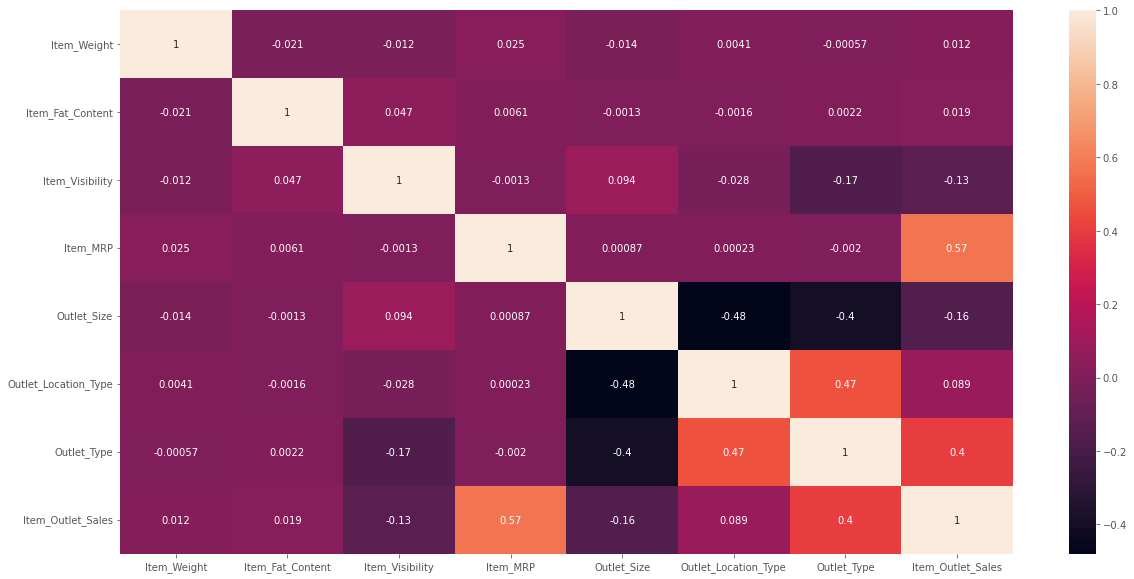

In [39]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)

In [40]:
dummies1=pd.get_dummies(data.Item_Type)
dummies2=pd.get_dummies(test.Item_Type)

In [41]:
data.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,Dairy,249.8092,1,0,1,3735.1380
1,5.92,1,0.019278,Soft Drinks,48.2692,1,2,2,443.4228


In [42]:
test.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.75,0,0.007565,Snack Foods,107.8622,1,0,1
1,8.30,1,0.038428,Dairy,87.3198,1,1,1


In [43]:
data =pd.concat([data, dummies1],axis=1)
test =pd.concat([test, dummies1],axis=1)

In [44]:
data.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Baking Goods,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,9.30,0,0.016047,Dairy,249.8092,1,0,1,3735.1380,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,1,0.019278,Soft Drinks,48.2692,1,2,2,443.4228,0,...,0,0,0,0,0,0,0,0,1,0


In [45]:
test.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Baking Goods,Breads,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,20.75,0.0,0.007565,Snack Foods,107.8622,1.0,0.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8.30,1.0,0.038428,Dairy,87.3198,1.0,1.0,1.0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [46]:
# Droping the main feature and one more dummy columns
data.drop(['Item_Type', 'Starchy Foods'], axis=1, inplace=True)
test.drop(['Item_Type', 'Starchy Foods'], axis=1, inplace=True)

In [47]:
FEATURES = [col for col in data.columns if col not in ['Item_Outlet_Sales', 'Outlet_Identifier']]
cat_features = [col for col in FEATURES if data[col].nunique() < 10]
cont_features = [col for col in FEATURES if data[col].nunique() >= 10]

In [48]:
cont_features

['Item_Weight', 'Item_Visibility', 'Item_MRP']

In [49]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Baking Goods,Breads,...,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks
0,9.30,0,0.016047,249.8092,1,0,1,3735.1380,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,1,0.019278,48.2692,1,2,2,443.4228,0,0,...,0,0,0,0,0,0,0,0,0,1
2,17.50,0,0.016760,141.6180,1,0,1,2097.2700,0,0,...,0,0,0,0,0,1,0,0,0,0
3,19.20,1,0.000000,182.0950,2,2,0,732.3800,0,0,...,0,1,0,0,0,0,0,0,0,0
4,8.93,0,0.000000,53.8614,0,2,1,994.7052,0,0,...,0,0,0,0,1,0,0,0,0,0


In [50]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Baking Goods,Breads,Breakfast,...,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks
0,20.750000,0.0,0.007565,107.8622,1.0,0.0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8.300000,1.0,0.038428,87.3198,1.0,1.0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,14.600000,0.0,0.099575,241.7538,1.0,2.0,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,7.315000,0.0,0.015388,155.0340,1.0,1.0,1.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,12.695633,1.0,0.118599,234.2300,1.0,2.0,3.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [51]:
X = data[cont_features]
X.head(2)

,Item_Weight,Item_Visibility,Item_MRP
0,9.30,0.016047,249.8092
1,5.92,0.019278,48.2692


In [52]:
test2=test[cont_features]
test2.head(2)

,Item_Weight,Item_Visibility,Item_MRP
0,20.75,0.007565,107.8622
1,8.30,0.038428,87.3198


In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
test2 = scaler.fit_transform(test2)


In [55]:
X = pd.DataFrame(X, columns=cont_features)
test2 = pd.DataFrame(test2, columns=cont_features)

In [56]:
X.head()

,Item_Weight,Item_Visibility,Item_MRP
0,-0.841872,-0.970732,1.747454
1,-1.641706,-0.908111,-1.489023
2,1.098554,-0.956917,0.010040
3,1.500838,-1.281758,0.660050
4,-0.929428,-1.281758,-1.399220


In [57]:
test2.head()

,Item_Weight,Item_Visibility,Item_MRP
0,1.897460e+00,-1.134077,-0.536555
1,-1.035530e+00,-0.531850,-0.868937
2,4.486336e-01,0.661316,1.629848
3,-1.267578e+00,-0.981416,0.226697
4,-5.189112e-14,1.032540,1.508110


In [58]:
FEATURES =[col for col in data.columns if col not in['Item_Outlet_Sales']]

In [59]:
FEATURES

['Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Baking Goods',
 'Breads',
 'Breakfast',
 'Canned',
 'Dairy',
 'Frozen Foods',
 'Fruits and Vegetables',
 'Hard Drinks',
 'Health and Hygiene',
 'Household',
 'Meat',
 'Others',
 'Seafood',
 'Snack Foods',
 'Soft Drinks']

In [60]:
cat_features = [col for col in FEATURES if data[col].nunique() < 25]
cat_features

['Item_Fat_Content',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Baking Goods',
 'Breads',
 'Breakfast',
 'Canned',
 'Dairy',
 'Frozen Foods',
 'Fruits and Vegetables',
 'Hard Drinks',
 'Health and Hygiene',
 'Household',
 'Meat',
 'Others',
 'Seafood',
 'Snack Foods',
 'Soft Drinks']

In [61]:
X =pd.concat([X, data[cat_features]],axis=1)
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type,Baking Goods,Breads,Breakfast,...,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks
0,-0.841872,-0.970732,1.747454,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.641706,-0.908111,-1.489023,1,1,2,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1.098554,-0.956917,0.010040,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1.500838,-1.281758,0.660050,1,2,2,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,-0.929428,-1.281758,-1.399220,0,0,2,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [62]:
y = data.Item_Outlet_Sales
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [63]:
test2 = pd.concat([test2,test[cat_features]],axis=1)
test2

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type,Baking Goods,Breads,Breakfast,...,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks
0,1.897460e+00,-1.134077,-0.536555,0.0,1.0,0.0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.035530e+00,-0.531850,-0.868937,1.0,1.0,1.0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,4.486336e-01,0.661316,1.629848,0.0,1.0,2.0,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,-1.267578e+00,-0.981416,0.226697,0.0,1.0,1.0,1.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,-5.189112e-14,1.032540,1.508110,1.0,1.0,2.0,3.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [64]:
test2.isnull().sum()

Item_Weight              2842
Item_Visibility          2842
Item_MRP                 2842
Item_Fat_Content         2842
Outlet_Size              2842
Outlet_Location_Type     2842
Outlet_Type              2842
Baking Goods                0
Breads                      0
Breakfast                   0
Canned                      0
Dairy                       0
Frozen Foods                0
Fruits and Vegetables       0
Hard Drinks                 0
Health and Hygiene          0
Household                   0
Meat                        0
Others                      0
Seafood                     0
Snack Foods                 0
Soft Drinks                 0
dtype: int64

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state = 0)

In [67]:
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

In [68]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor

##### Linear Regression

In [69]:
# #creating pipeline and transforming columns
# step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False, drop='first'),[1,3,6,7,8])],remainder='passthrough')

# step2 =LinearRegression()

# pipe=Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])

# pipe.fit(X_train, y_train)

# y_pred1=pipe.predict(X_test)

# print("R2_Score:%.2f" % r2_score(y_test,y_pred1))
# print("mean_absolute_error:%.2f" % mean_absolute_error(y_test,y_pred1))


#### Ridge Regression

In [70]:
# #creating pipeline and transforming columns
# step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False, drop='first'),[1,3,6,7,8])],remainder='passthrough')

# step2 = Ridge(alpha=10)

# pipe=Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])

# pipe.fit(X_train, y_train)

# y_pred2=pipe.predict(X_test)

# print("R2_Score:%.2f" % r2_score(y_test,y_pred2))
# print("mean_absolute_error:%.2f" % mean_absolute_error(y_test,y_pred2))

#### KNN

In [71]:
# #creating pipeline and transforming columns
# step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False, drop='first'),[1,3,6,7,8])],remainder='passthrough')

# step2 = KNeighborsRegressor(n_neighbors=3)

# pipe=Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])

# pipe.fit(X_train, y_train)

# y_pred3=pipe.predict(X_test)

# print("R2_Score:%.2f" % r2_score(y_test,y_pred3))
# print("mean_absolute_error:%.2f" % mean_absolute_error(y_test,y_pred3))

#### Decision Tree

In [72]:
# #creating pipeline and transforming columns
# step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False, drop='first'),[1,3,6,7,8])],remainder='passthrough')

# step2 = DecisionTreeRegressor(max_depth=5, random_state=2)

# pipe=Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])

# pipe.fit(X_train, y_train)

# y_pred4=pipe.predict(X_test)

# print("R2_Score:%.2f" % r2_score(y_test,y_pred4))
# print("mean_absolute_error:%.2f" % mean_absolute_error(y_test,y_pred4))

#### Random Forest

In [73]:
# #creating pipeline and transforming columns
# step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False, drop='first'),[1,3,6,7,8])],remainder='passthrough')

# step2 = RandomForestRegressor(n_estimators=100,
#                              random_state=2,
#                              max_samples=0.5,
#                              max_features=0.75,
#                              max_depth=15)

# pipe=Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])

# pipe.fit(X_train, y_train)

# y_pred5=pipe.predict(X_test)

# print("R2_Score:%.2f" % r2_score(y_test,y_pred5))
# print("mean_absolute_error:%.2f" % mean_absolute_error(y_test,y_pred5))

### Extra Tree

In [74]:
# #creating pipeline and transforming columns
# step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False, drop='first'),[1,3,6,7,8])],remainder='passthrough')

# step2 = ExtraTreesRegressor(n_estimators=100,
#                              random_state=3,
#                              max_samples=0.5,
#                              max_features=0.75,
#                              max_depth=15)

# pipe=Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])

# pipe.fit(X_train, y_train)

# y_pred6=pipe.predict(X_test)

# print("R2_Score:%.2f" % r2_score(y_test,y_pred6))
# print("mean_absolute_error:%.2f" % mean_absolute_error(y_test,y_pred6))

### AdaBoost

In [75]:
# #creating pipeline and transforming columns
# step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False, drop='first'),[1,3,6,7,8])],remainder='passthrough')

# step2 = AdaBoostRegressor(n_estimators=15, learning_rate=1.0)

# pipe=Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])

# pipe.fit(X_train, y_train)

# y_pred7=pipe.predict(X_test)

# print("R2_Score:%.2f" % r2_score(y_test,y_pred7))
# print("mean_absolute_error:%.2f" % mean_absolute_error(y_test,y_pred7))

#### Grafient Boosting

In [76]:
# #creating pipeline and transforming columns
# step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False, drop='first'),[1,3,6,7,8])],remainder='passthrough')

# step2 = GradientBoostingRegressor(n_estimators=50)

# pipe=Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])

# pipe.fit(X_train, y_train)

# y_pred8=pipe.predict(X_test)

# print("R2_Score:%.2f" % r2_score(y_test,y_pred8))
# print("mean_absolute_error:%.2f" % mean_absolute_error(y_test,y_pred8))

### XGB Regressor

In [77]:
# #creating pipeline and transforming columns
# step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False, drop='first'),[1,3,6,7,8])],remainder='passthrough')

# step2 = XGBRegressor(n_estimators=100, max_depth=5,learning_rate=0.5)

# pipe=Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])

# pipe.fit(X_train, y_train)

# y_pred9=pipe.predict(X_test)

# print("R2_Score:%.2f" % r2_score(y_test,y_pred9))
# print("mean_absolute_error:%.2f" % mean_absolute_error(y_test,y_pred9))

In [78]:
def kfolds(model, model_name):
    model = cross_val_score(model, X,y, cv=10)
    model_score = np.average(model)
    print(f"{model_name} score on cross validation: {model_score * 100}%")

def train(model, model_name):
    model.fit(X_train, y_train)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    print(f"{model_name} model score on Training data: {model_train_score * 100}%\n{model_name} model score on Testing data: {model_test_score * 100}%")

def r2(model, model_name):
    score = r2_score(y_test, model.predict(X_test))
    print(f"R2 Score for {model_name} is {score * 100}%")

### Random Forest Regressor Model

In [79]:
rf_model = RandomForestRegressor()
kfolds(rf_model, "Random Forest")
train(rf_model, "Random Forest")

Random Forest score on cross validation: 54.08302516634394%
Random Forest model score on Training data: 93.71509741680833%
Random Forest model score on Testing data: 54.93070379928362%


In [80]:
r2(rf_model,"Random Forest")

R2 Score for Random Forest is 54.93070379928362%


#### Gradient Boosting Regressor Model

In [81]:
gbr = GradientBoostingRegressor()
kfolds(gbr, "Gradient Boosting")
train(gbr, "Gradient Boosting")

Gradient Boosting score on cross validation: 59.31932875238163%
Gradient Boosting model score on Training data: 63.570451299262075%
Gradient Boosting model score on Testing data: 59.25774870932731%


In [82]:
r2(gbr, "Gradient Boosting")

R2 Score for Gradient Boosting is 59.25774870932731%


#### Linear Regression Model

In [83]:
lr =LinearRegression()
kfolds(lr, "Linear Regerssoion")
train(lr, "Linear Regerssoion")

Linear Regerssoion score on cross validation: 49.72176072145514%
Linear Regerssoion model score on Training data: 50.1753120580591%
Linear Regerssoion model score on Testing data: 50.07392305204299%


In [84]:
r2(lr, "Linear Regerssoion")

R2 Score for Linear Regerssoion is 50.07392305204299%


#### Decision Tree Model

In [85]:
dtr =DecisionTreeRegressor()
kfolds(dtr, "Desision Tree")
train(dtr, "Decision Tree")

Desision Tree score on cross validation: 17.196124661167%
Decision Tree model score on Training data: 100.0%
Decision Tree model score on Testing data: 20.796903823843394%


In [86]:
r2(dtr, "Decision Tree")

R2 Score for Decision Tree is 20.796903823843394%


#### XGBoost Regressor

In [87]:
xgboost = XGBRegressor()
kfolds(xgboost, "Xgboost")
train(xgboost, "Xgboost")

Xgboost score on cross validation: 53.089176287825005%
Xgboost model score on Training data: 85.33418897865789%
Xgboost model score on Testing data: 51.78142965782258%


In [88]:
r2(xgboost, "Xgboost")

R2 Score for Xgboost is 51.78142965782258%


#### Submission File

* Gradient Boosting is best

In [89]:
gbr.fit(X,y)

GradientBoostingRegressor()

In [90]:
gbr.score(X,y)

0.6268433748783974

In [ ]:
y_pred= gbr.predict(test2)